# Execução do modelo
_Modelo rodando com dados de teste_

---

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento das bases**
3. **Análise dos dataframes**
4. **Executando o modelo**
    - 4.1. Carregando o modelo
    - 4.2. Realizando as previsões
    - 4.3. Visualização gráfica das previsões
        - 4.3.1. Visualização de 3 meses para a drogaria 1013
        - 4.3.2. Visualização de 3 meses para a drogaria 383
        - 4.3.3. Visualização de 3 meses para a drogaria 262        

<br>

---

<br>

## 1. Importação de bibliotecas

In [222]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import optuna
import joblib

In [223]:
# Configurações para exibição de dados no Jupyter Notebook

# Configurar opção para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Suprimir logs do Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Configurar estilo dos gráficos do Seaborn
sns.set_style('whitegrid')

## 2. Carregamento das bases

In [224]:
# Efetuando a limpeza da memória antes do carregamento dos dados

print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 21163


In [225]:
# Criando um dataframe a partir do arquivo train_001.csv
# Base utilizada no treinamento do modelo

df_train = pd.read_csv('dados/train_001.csv', sep=',')
print('\nDATAFRAME: df_train')
df_train.head()


DATAFRAME: df_train


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoRollingSum_21,PromoRollingSum_28,PromoRollingSum_30,PromoRollingSum_60,PromoRollingSum_90,PromoRollingSum_120,PromoRollingSum_150,PromoRollingSum_180,PromoRollingSum_360,Target
0,1,1,2015-06-30,1,1,0,0,c,a,1270.0,...,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,149389.0
1,2,1,2015-06-30,1,1,0,0,a,a,570.0,...,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,170586.0
2,3,1,2015-06-30,1,1,0,1,a,a,14130.0,...,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,243725.0
3,4,1,2015-06-30,1,1,0,0,c,c,620.0,...,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,334601.0
4,5,1,2015-06-30,1,1,0,0,a,a,29910.0,...,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,162182.0


In [226]:
# Criando um dataframe a partir do arquivo validation_001.csv
# Base utilizada na validação do modelo

df_validation = pd.read_csv('dados/validation_001.csv', sep=',')
print('\nDATAFRAME: df_validation')
df_validation.head()


DATAFRAME: df_validation


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoRollingSum_21,PromoRollingSum_28,PromoRollingSum_30,PromoRollingSum_60,PromoRollingSum_90,PromoRollingSum_120,PromoRollingSum_150,PromoRollingSum_180,PromoRollingSum_360,Target
0,1,4,2015-07-31,1,1,0,1,c,a,1270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157057.0
1,2,4,2015-07-31,1,1,0,1,a,a,570.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176872.0
2,3,4,2015-07-31,1,1,0,1,a,a,14130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,245876.0
3,4,4,2015-07-31,1,1,0,1,c,c,620.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,355383.0
4,5,4,2015-07-31,1,1,0,1,a,a,29910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162083.0


In [227]:
# Criando um dataframe a partir do arquivo test_001.csv
# Base a ser utilizada no teste do modelo

df_test = pd.read_csv('dados/test_001.csv', sep=',')
print('\nDATAFRAME: df_test')
df_test.head()


DATAFRAME: df_test


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoRollingSum_14,PromoRollingSum_21,PromoRollingSum_28,PromoRollingSum_30,PromoRollingSum_60,PromoRollingSum_90,PromoRollingSum_120,PromoRollingSum_150,PromoRollingSum_180,PromoRollingSum_360
0,1,3,2015-09-17,1.0,1,0,0,c,a,1270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,3,2015-09-17,1.0,1,0,0,a,a,14130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,3,2015-09-17,1.0,1,0,0,a,c,24000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,3,2015-09-17,1.0,1,0,0,a,a,7520.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,3,2015-09-17,1.0,1,0,0,a,c,2030.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Análise dos dataframes

In [228]:
# Exibindo a quantidade de linhas e colunas dos dataframes

# Criação de um dicionário com os dataframes e seus respectivos nomes
dfs = {
    'df_train': df_train,
    'df_validation': df_validation,
    'df_test': df_test
}

# Iteração sobre o dicionário para exibir o nome e as dimensões dos dataframes
print(f'\nVOLUMETRIA')
for nome, df in dfs.items():
    print(f'\n{nome}')
    print(f'-'*45)
    print(f'Quantidade de linhas (registros):  {df.shape[0]}')
    print(f'Quantidade de colunas (variáveis): {df.shape[1]}')    


VOLUMETRIA

df_train
---------------------------------------------
Quantidade de linhas (registros):  943795
Quantidade de colunas (variáveis): 38

df_validation
---------------------------------------------
Quantidade de linhas (registros):  34565
Quantidade de colunas (variáveis): 38

df_test
---------------------------------------------
Quantidade de linhas (registros):  41088
Quantidade de colunas (variáveis): 37


In [229]:
def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': round((dataframe.isnull().sum()/len(dataframe))*100, 2),
        'Cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='Qtde de nulos', ascending=False)
    metadados = metadados.reset_index(drop=True)
    return metadados

In [230]:
# Metadados do dataframe de teste

gerar_metadados(df_test)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,Store,int64,0,0.0,856
1,Quarter,int64,0,0.0,1
2,DayOfYear,int64,0,0.0,48
3,MonthsSinceTheCompetitionOpened,float64,0,0.0,197
4,YearsSinceTheCompetitionOpened,float64,0,0.0,198
5,PromoRollingSum_3,float64,0,0.0,4
6,PromoRollingSum_5,float64,0,0.0,6
7,PromoRollingSum_7,float64,0,0.0,6
8,PromoRollingSum_14,float64,0,0.0,2
9,PromoRollingSum_21,float64,0,0.0,7


## 4. Executando o modelo

### 4.1. Carregando o modelo

In [231]:
# Carregando o modelo salvo em pkl
try:
    model = joblib.load('modelos/pipeline_best_model_lightgbm.pkl')
    print('\nModelo carregado com sucesso!')
except FileNotFoundError:
    print('Erro: O arquivo do modelo não foi encontrado!')
except Exception as e:
    print(f'Erro ao carregar o modelo: {e}')


Modelo carregado com sucesso!


### 4.2. Realizando as previsões

In [232]:
# Realizando as previsões utilizando o modelo

previsoes = model.predict(df_test)

In [233]:
# Atribuindo ao dataframe de teste as previsões

df_test['Target_42_days'] = previsoes

In [234]:
# Exibindo as 10 primeiras previsões para as drogarias

df_test[['Store', 'Date', 'Target_42_days']].head(10)

,Store,Date,Target_42_days
0,1,2015-09-17,172305.137384
1,3,2015-09-17,217256.568087
2,7,2015-09-17,295561.381264
3,8,2015-09-17,190788.824345
4,9,2015-09-17,235908.894014
5,10,2015-09-17,172714.909880
6,11,2015-09-17,257997.155588
7,12,2015-09-17,250413.836275
8,13,2015-09-17,162193.902640
9,14,2015-09-17,177224.710602


### 4.3. Visualização gráfica das previsões

In [235]:
def plot_evolucao_vendas(df_train, df_validation, df_test, store):
    '''
    Gera um gráfico de evolução de vendas para uma drogaria específica.
    
    Gera um gráfico de evolução de vendas (treino, validação e teste) para uma drogaria específica.

    :param df_train: pd.DataFrame
        DataFrame contendo os dados históricos (treino).
    :param df_validation: pd.DataFrame
        DataFrame contendo os dados de validação (teste).
    :param df_test: pd.DataFrame
        DataFrame contendo os dados de teste (previsão).
    :param store: int or str
        Identificador da drogaria para a qual o gráfico será gerado.

    :return: None
        Exibe o gráfico diretamente.
    '''
    # Filtrar dados para a drogaria selecionada
    df_train_00 = df_train[(df_train['Store'] == store) & 
                           (df_train['Date'] >= '2015-04-01') & 
                           (df_train['Date'] <= '2015-07-31')]
    df_validation_00 = df_validation[df_validation['Store'] == store]
    df_test_00 = df_test[df_test['Store'] == store]

    # Convertendo colunas de data para datetime
    df_train_00['Date'] = pd.to_datetime(df_train_00['Date'])
    df_validation_00['Date'] = pd.to_datetime(df_validation_00['Date'])
    df_test_00['Date'] = pd.to_datetime(df_test_00['Date'])

    # Criando colunas de semana
    df_train_00['Week'] = df_train_00['Date'].dt.to_period('W').astype(str)
    df_validation_00['Week'] = df_validation_00['Date'].dt.to_period('W').astype(str)
    df_test_00['Week'] = df_test_00['Date'].dt.to_period('W').astype(str)

    # Agrupando dados por semana
    df_train_01 = df_train_00.groupby('Week')['Target'].sum().reset_index()
    df_validation_01 = df_validation_00.groupby('Week')['Target'].sum().reset_index()
    df_test_01 = df_test_00.groupby('Week')['Target_42_days'].sum().reset_index()

    # Criar o gráfico
    plt.figure(figsize=(12, 6))

    # Gráficos de treino, validação e teste
    plt.stackplot(df_train_01['Week'], df_train_01['Target'], 
                  labels=['Histórico (treino)'], colors=['#999999'], alpha=0.6)
    plt.stackplot(df_validation_01['Week'], df_validation_01['Target'], 
                  labels=['Teste (validação)'], colors=['#99a999'], alpha=0.6)
    plt.stackplot(df_test_01['Week'], df_test_01['Target_42_days'], 
                  labels=['Previsão (teste)'], colors=['#28a745'], alpha=0.6)

    # Combinar todas as semanas em uma lista única e ordenada
    all_weeks = sorted(
        list(set(df_train_01['Week'])
             .union(set(df_validation_01['Week']))
             .union(set(df_test_01['Week'])))
    )

    # Gerar os rótulos de semanas em intervalos regulares
    interval = 3
    ticks = range(0, len(all_weeks), interval)
    labels = [all_weeks[i] for i in ticks]

    # Ajusta o formato dos rótulos do eixo y
    plt.ticklabel_format(style='plain', axis='y')

    # Atualizar os rótulos do eixo X
    plt.xticks(ticks=ticks, labels=labels, rotation=30, ha='right')

    # Melhorando o título e os rótulos
    plt.title('Evolução de vendas: Histórico, Teste e Previsão', 
              fontsize=14, fontweight='bold')
    plt.xlabel('\nSemanas', fontsize=12)
    plt.ylabel('Vendas Acumuladas\n', fontsize=12)

    # Aumentar o limite do eixo Y
    plt.ylim(0, df_train_01['Target'].max() * 1.3)

    # Configurar a legenda centralizada
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=10)

    # Melhorando o layout geral
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

#### 4.3.1. Visualização de 3 meses para a drogaria 1013

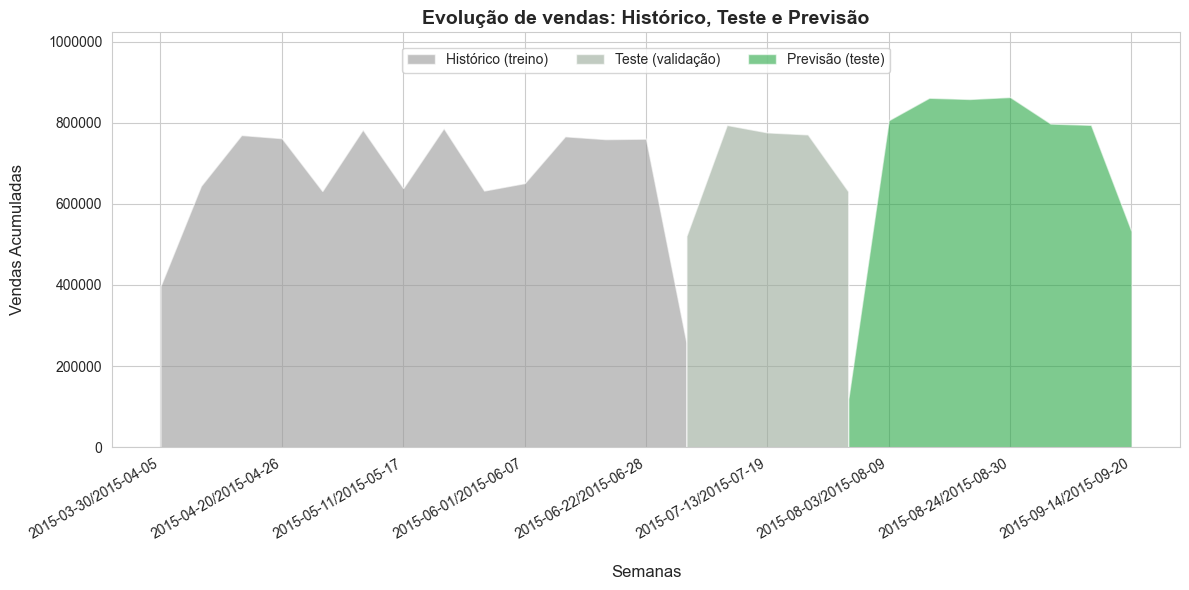

In [236]:
plot_evolucao_vendas(df_train, df_validation, df_test, 1013)

#### 4.3.2. Visualização de 3 meses para a drogaria 383

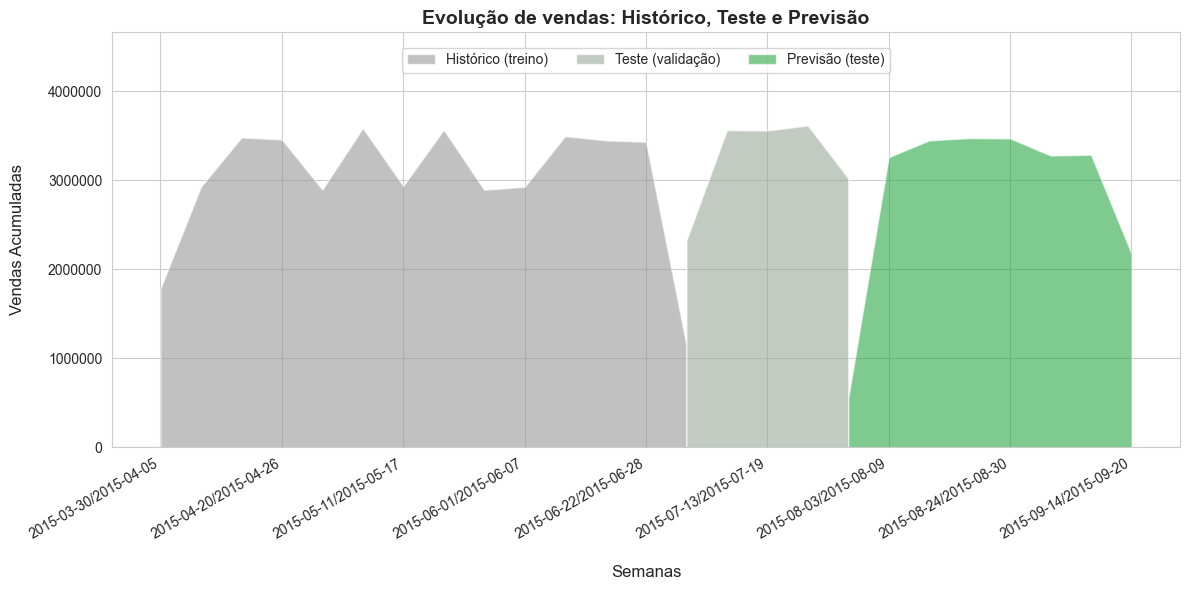

In [237]:
plot_evolucao_vendas(df_train, df_validation, df_test, 383)

#### 4.3.3. Visualização de 3 meses para a drogaria 262

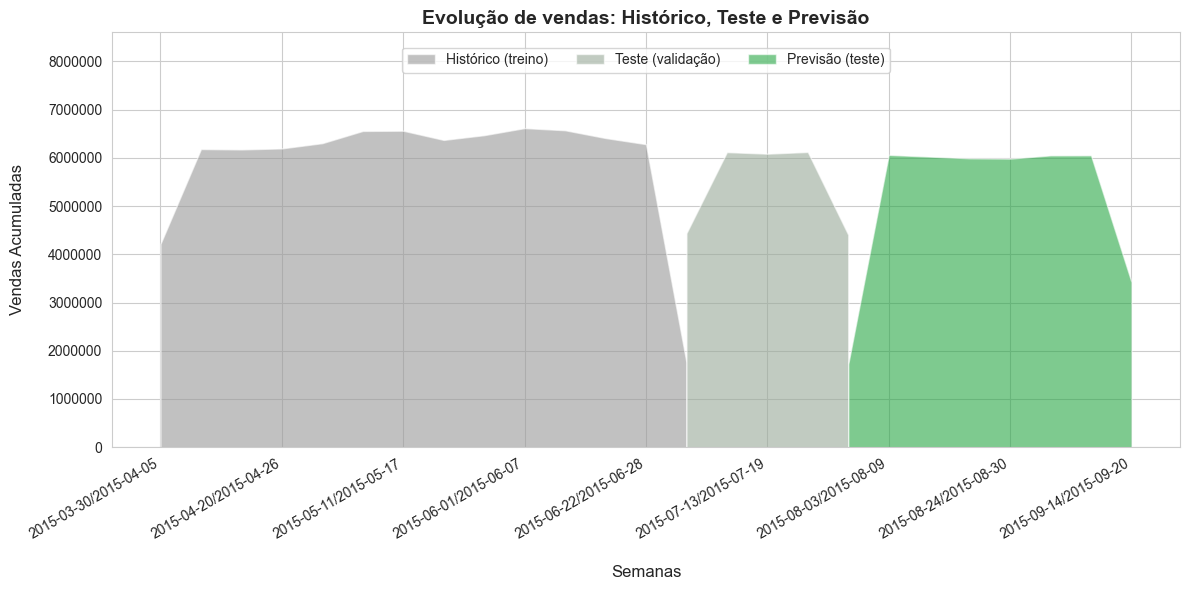

In [238]:
plot_evolucao_vendas(df_train, df_validation, df_test, 262)

## 5. Análise do modelo e impacto no negócio